In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
from sklearn.preprocessing import LabelEncoder 
import pickle
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import rcParams
from scipy import stats
sns.color_palette("light:b", as_cmap=True)
import xgboost as xgb

In [2]:
df=pd.read_csv('/users/sriharsha/downloads/l1_data.csv')

In [104]:
df.head(5)


,physician_id,physician_efficiency,metro_area,physician_working_specialty,physician_gender,physician_credential,physician_med_school,physician_graduation_year,bump_feature,engineered_feature_1,engineered_feature_2,engineered_feature_3,medicare_engineered_1,medicare_engineered_2,medicare_engineered_3,medicare_enginerred_4,medicare_engineered_5,medicare_engineered_6,num_medicare_patients,medicare_patient_hcc_risk_score
0,2,0.92,Chicago,Radiology,M,UNKNOWN,BOSTON UNIVERSITY SCHOOL OF MEDICINE,1995.0,3228,1.132,1.154,7.7,2.50,3,0,2,0,3,1482,2.055
1,3,0.72,Chicago,Urology,M,MD,"LOYOLA UNIVERSITY OF CHICAGO, STRITCH SCHOOL O...",1976.0,1077,1.756,1.736,13.1,4.00,4,4,5,3,4,522,1.398
2,4,1.08,Dallas,Family Practice,F,MD,UNIVERSITY OF TEXAS MEDICAL BRANCH AT GALVESTON,2001.0,6034,1.093,1.086,12.9,2.50,3,3,3,3,1,87,0.800
3,5,0.97,Dallas,Facial Surgery and Otolaryngology,M,MD,BAYLOR COLLEGE OF MEDICINE,1991.0,4098,1.231,1.231,14.2,2.25,2,2,5,1,1,330,1.014
4,6,1.00,Dallas,OB/GYN,F,UNKNOWN,UNIVERSITY OF TEXAS MEDICAL SCHOOL AT SAN ANTONIO,1999.0,4652,1.056,1.056,8.5,4.00,4,5,4,2,5,30,0.806


In [105]:
df.describe()

,physician_id,physician_efficiency,physician_graduation_year,bump_feature,engineered_feature_1,engineered_feature_2,engineered_feature_3,medicare_engineered_1,medicare_engineered_2,medicare_engineered_3,medicare_enginerred_4,medicare_engineered_5,medicare_engineered_6,num_medicare_patients,medicare_patient_hcc_risk_score
count,7393.000000,7393.000000,6674.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000
mean,4998.183417,1.056228,1995.603386,4948.712836,1.088763,1.067009,10.071081,2.802573,2.911944,2.647099,2.389287,2.421750,2.792371,495.109022,1.545016
std,2882.632252,0.355256,170.544852,2917.906257,0.409342,0.249731,4.844017,0.829564,0.884700,1.507928,1.679374,1.607064,1.385428,615.225229,0.794146
min,2.000000,0.100000,1954.000000,12.000000,0.047000,0.047000,0.300000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2495.000000,0.860000,1984.000000,2348.000000,0.920000,0.957000,6.100000,2.250000,2.000000,1.000000,1.000000,1.000000,2.000000,150.000000,1.037000
50%,5009.000000,1.010000,1993.000000,4943.000000,1.050000,1.054000,10.000000,2.750000,3.000000,3.000000,2.000000,2.000000,3.000000,317.000000,1.354000
75%,7475.000000,1.200000,2001.000000,7545.000000,1.181000,1.150000,14.100000,3.333000,3.000000,4.000000,4.000000,4.000000,4.000000,594.000000,1.830000
max,10002.000000,2.990000,9999.000000,9951.000000,19.907000,10.783000,29.100000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,7090.000000,8.194000


Query

with t as(
select physician_id,
       rank() over(order by physician_efficiency asc) as rnk
from l1_data
where physician_med_school='UNKNOWN'
and physician_working_specialty='Internal Medicine'
and num_medicare_patients between 200 and 400)
select physician_id from t
where rnk=1;

#ans
2784 and 5129

Query

Answer

2023

In [3]:
df.isna().sum()

physician_id                         0
physician_efficiency                 0
metro_area                           0
physician_working_specialty          0
physician_gender                     0
physician_credential                 0
physician_med_school                 0
physician_graduation_year          719
bump_feature                         0
engineered_feature_1                 0
engineered_feature_2                 0
engineered_feature_3                 0
medicare_engineered_1                0
medicare_engineered_2                0
medicare_engineered_3                0
medicare_enginerred_4                0
medicare_engineered_5                0
medicare_engineered_6                0
num_medicare_patients                0
medicare_patient_hcc_risk_score      0
dtype: int64

Text(0.5, 1.0, 'Physician Efficiency Distribution')

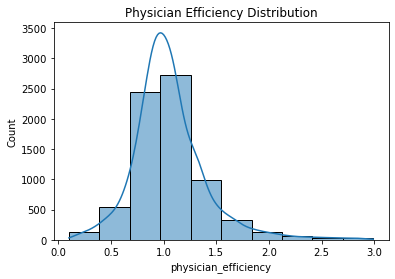

In [4]:
#Checking the distribution of physician_efficiency
sns.histplot(x='physician_efficiency',data=df,kde=True,bins=10)
plt.title('Physician Efficiency Distribution')

In [5]:
#creating data frame with physician_working_specialty as Family Practice'
df_FP=df[df['physician_working_specialty']=='Family Practice']

Text(0.5, 1.0, 'Family Practice Physician Efficiency Distribution')

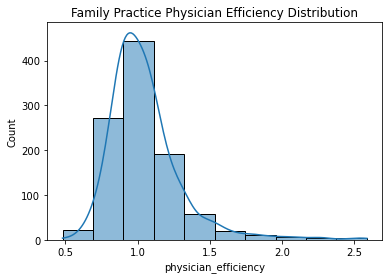

In [6]:
#Distribution of physician_efficiency
sns.histplot(x='physician_efficiency',data=df_FP,kde=True,bins=10)
plt.title('Family Practice Physician Efficiency Distribution')

In [7]:
df_ONC=df[df['physician_working_specialty']=='Oncology']

Text(0.5, 1.0, 'Family Practice Physician Efficiency Distribution')

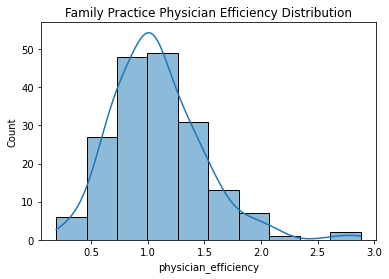

In [8]:
sns.histplot(x='physician_efficiency',data=df_ONC,kde=True,bins=10)
plt.title('Family Practice Physician Efficiency Distribution')

Answer

In [9]:
df.corr(method ='pearson')

,physician_id,physician_efficiency,physician_graduation_year,bump_feature,engineered_feature_1,engineered_feature_2,engineered_feature_3,medicare_engineered_1,medicare_engineered_2,medicare_engineered_3,medicare_enginerred_4,medicare_engineered_5,medicare_engineered_6,num_medicare_patients,medicare_patient_hcc_risk_score
physician_id,1.000000,-0.000212,-0.032589,0.017067,-0.007993,0.016665,-0.010132,0.016997,0.026023,0.013255,-0.005456,0.002505,0.022504,-0.009264,-0.005672
physician_efficiency,-0.000212,1.000000,0.005723,0.895089,0.262039,0.231476,0.319305,0.086451,0.081688,0.050180,0.022003,0.024428,0.085127,-0.031170,0.091189
physician_graduation_year,-0.032589,0.005723,1.000000,0.005431,-0.007540,-0.014475,0.030025,-0.021593,-0.025609,-0.021421,-0.013937,-0.002324,-0.006752,-0.021718,-0.012124
bump_feature,0.017067,0.895089,0.005431,1.000000,0.246717,0.238083,0.258691,0.087219,0.083156,0.051964,0.011503,0.013268,0.096124,-0.029684,0.086945
engineered_feature_1,-0.007993,0.262039,-0.007540,0.246717,1.000000,0.622483,0.076735,0.019418,0.016153,-0.014070,-0.013700,0.031014,0.053974,0.036927,0.027676
engineered_feature_2,0.016665,0.231476,-0.014475,0.238083,0.622483,1.000000,0.058089,0.029353,0.028360,-0.033377,0.014530,0.005137,0.045034,0.046417,0.082537
engineered_feature_3,-0.010132,0.319305,0.030025,0.258691,0.076735,0.058089,1.000000,0.029102,0.022147,-0.002736,-0.007662,0.012453,0.033376,-0.012552,0.023884
medicare_engineered_1,0.016997,0.086451,-0.021593,0.087219,0.019418,0.029353,0.029102,1.000000,0.949004,0.524464,0.456120,0.411918,0.569762,0.100272,0.111215
medicare_engineered_2,0.026023,0.081688,-0.025609,0.083156,0.016153,0.028360,0.022147,0.949004,1.000000,0.495189,0.446745,0.386648,0.536168,0.104382,0.106882
medicare_engineered_3,0.013255,0.050180,-0.021421,0.051964,-0.014070,-0.033377,-0.002736,0.524464,0.495189,1.000000,0.190693,0.147675,0.171102,-0.085615,0.001334


In [10]:
df.corr(method ='kendall')

,physician_id,physician_efficiency,physician_graduation_year,bump_feature,engineered_feature_1,engineered_feature_2,engineered_feature_3,medicare_engineered_1,medicare_engineered_2,medicare_engineered_3,medicare_enginerred_4,medicare_engineered_5,medicare_engineered_6,num_medicare_patients,medicare_patient_hcc_risk_score
physician_id,1.000000,0.004480,0.006196,0.014697,-0.004804,0.005266,-0.007548,0.011090,0.020910,0.010305,-0.003670,0.002210,0.017708,-0.010594,-0.009035
physician_efficiency,0.004480,1.000000,0.095714,0.994867,0.299874,0.246131,0.165637,0.057982,0.062598,0.038492,0.008384,0.008901,0.070862,-0.023613,0.073536
physician_graduation_year,0.006196,0.095714,1.000000,0.095218,0.020178,0.011454,0.040043,-0.050339,-0.049234,0.013812,-0.048436,-0.120681,-0.012114,-0.118788,0.036581
bump_feature,0.014697,0.994867,0.095218,1.000000,0.298277,0.244911,0.164641,0.057797,0.062480,0.038333,0.008335,0.009050,0.070604,-0.023582,0.073072
engineered_feature_1,-0.004804,0.299874,0.020178,0.298277,1.000000,0.580787,0.062072,0.016056,0.018158,-0.017843,-0.037654,0.013257,0.055551,0.013881,0.069261
engineered_feature_2,0.005266,0.246131,0.011454,0.244911,0.580787,1.000000,0.050003,0.011259,0.013495,-0.042614,-0.027452,-0.006307,0.051605,0.013396,0.110524
engineered_feature_3,-0.007548,0.165637,0.040043,0.164641,0.062072,0.050003,1.000000,0.017551,0.014937,-0.003602,-0.007049,0.005568,0.022122,-0.020633,0.021219
medicare_engineered_1,0.011090,0.057982,-0.050339,0.057797,0.016056,0.011259,0.017551,1.000000,0.859272,0.427417,0.357224,0.309551,0.447713,0.142127,0.083587
medicare_engineered_2,0.020910,0.062598,-0.049234,0.062480,0.018158,0.013495,0.014937,0.859272,1.000000,0.439305,0.378576,0.321268,0.458769,0.155093,0.088452
medicare_engineered_3,0.010305,0.038492,0.013812,0.038333,-0.017843,-0.042614,-0.003602,0.427417,0.439305,1.000000,0.154229,0.114756,0.138021,0.074645,-0.015771


<AxesSubplot:xlabel='medicare_engineered_1', ylabel='medicare_engineered_1'>

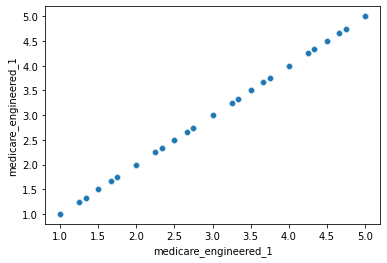

In [12]:
sns.scatterplot(x='medicare_engineered_1',y='medicare_engineered_1',data=df)

In [13]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
print(to_drop)
# Drop features 
df.drop(to_drop, axis=1, inplace=True)

['medicare_engineered_2']


<ipython-input-13-91e0f7af5695>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


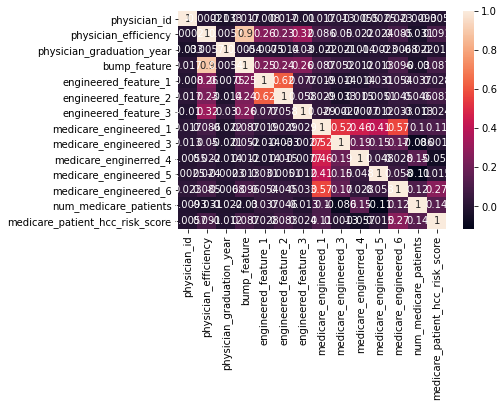

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()



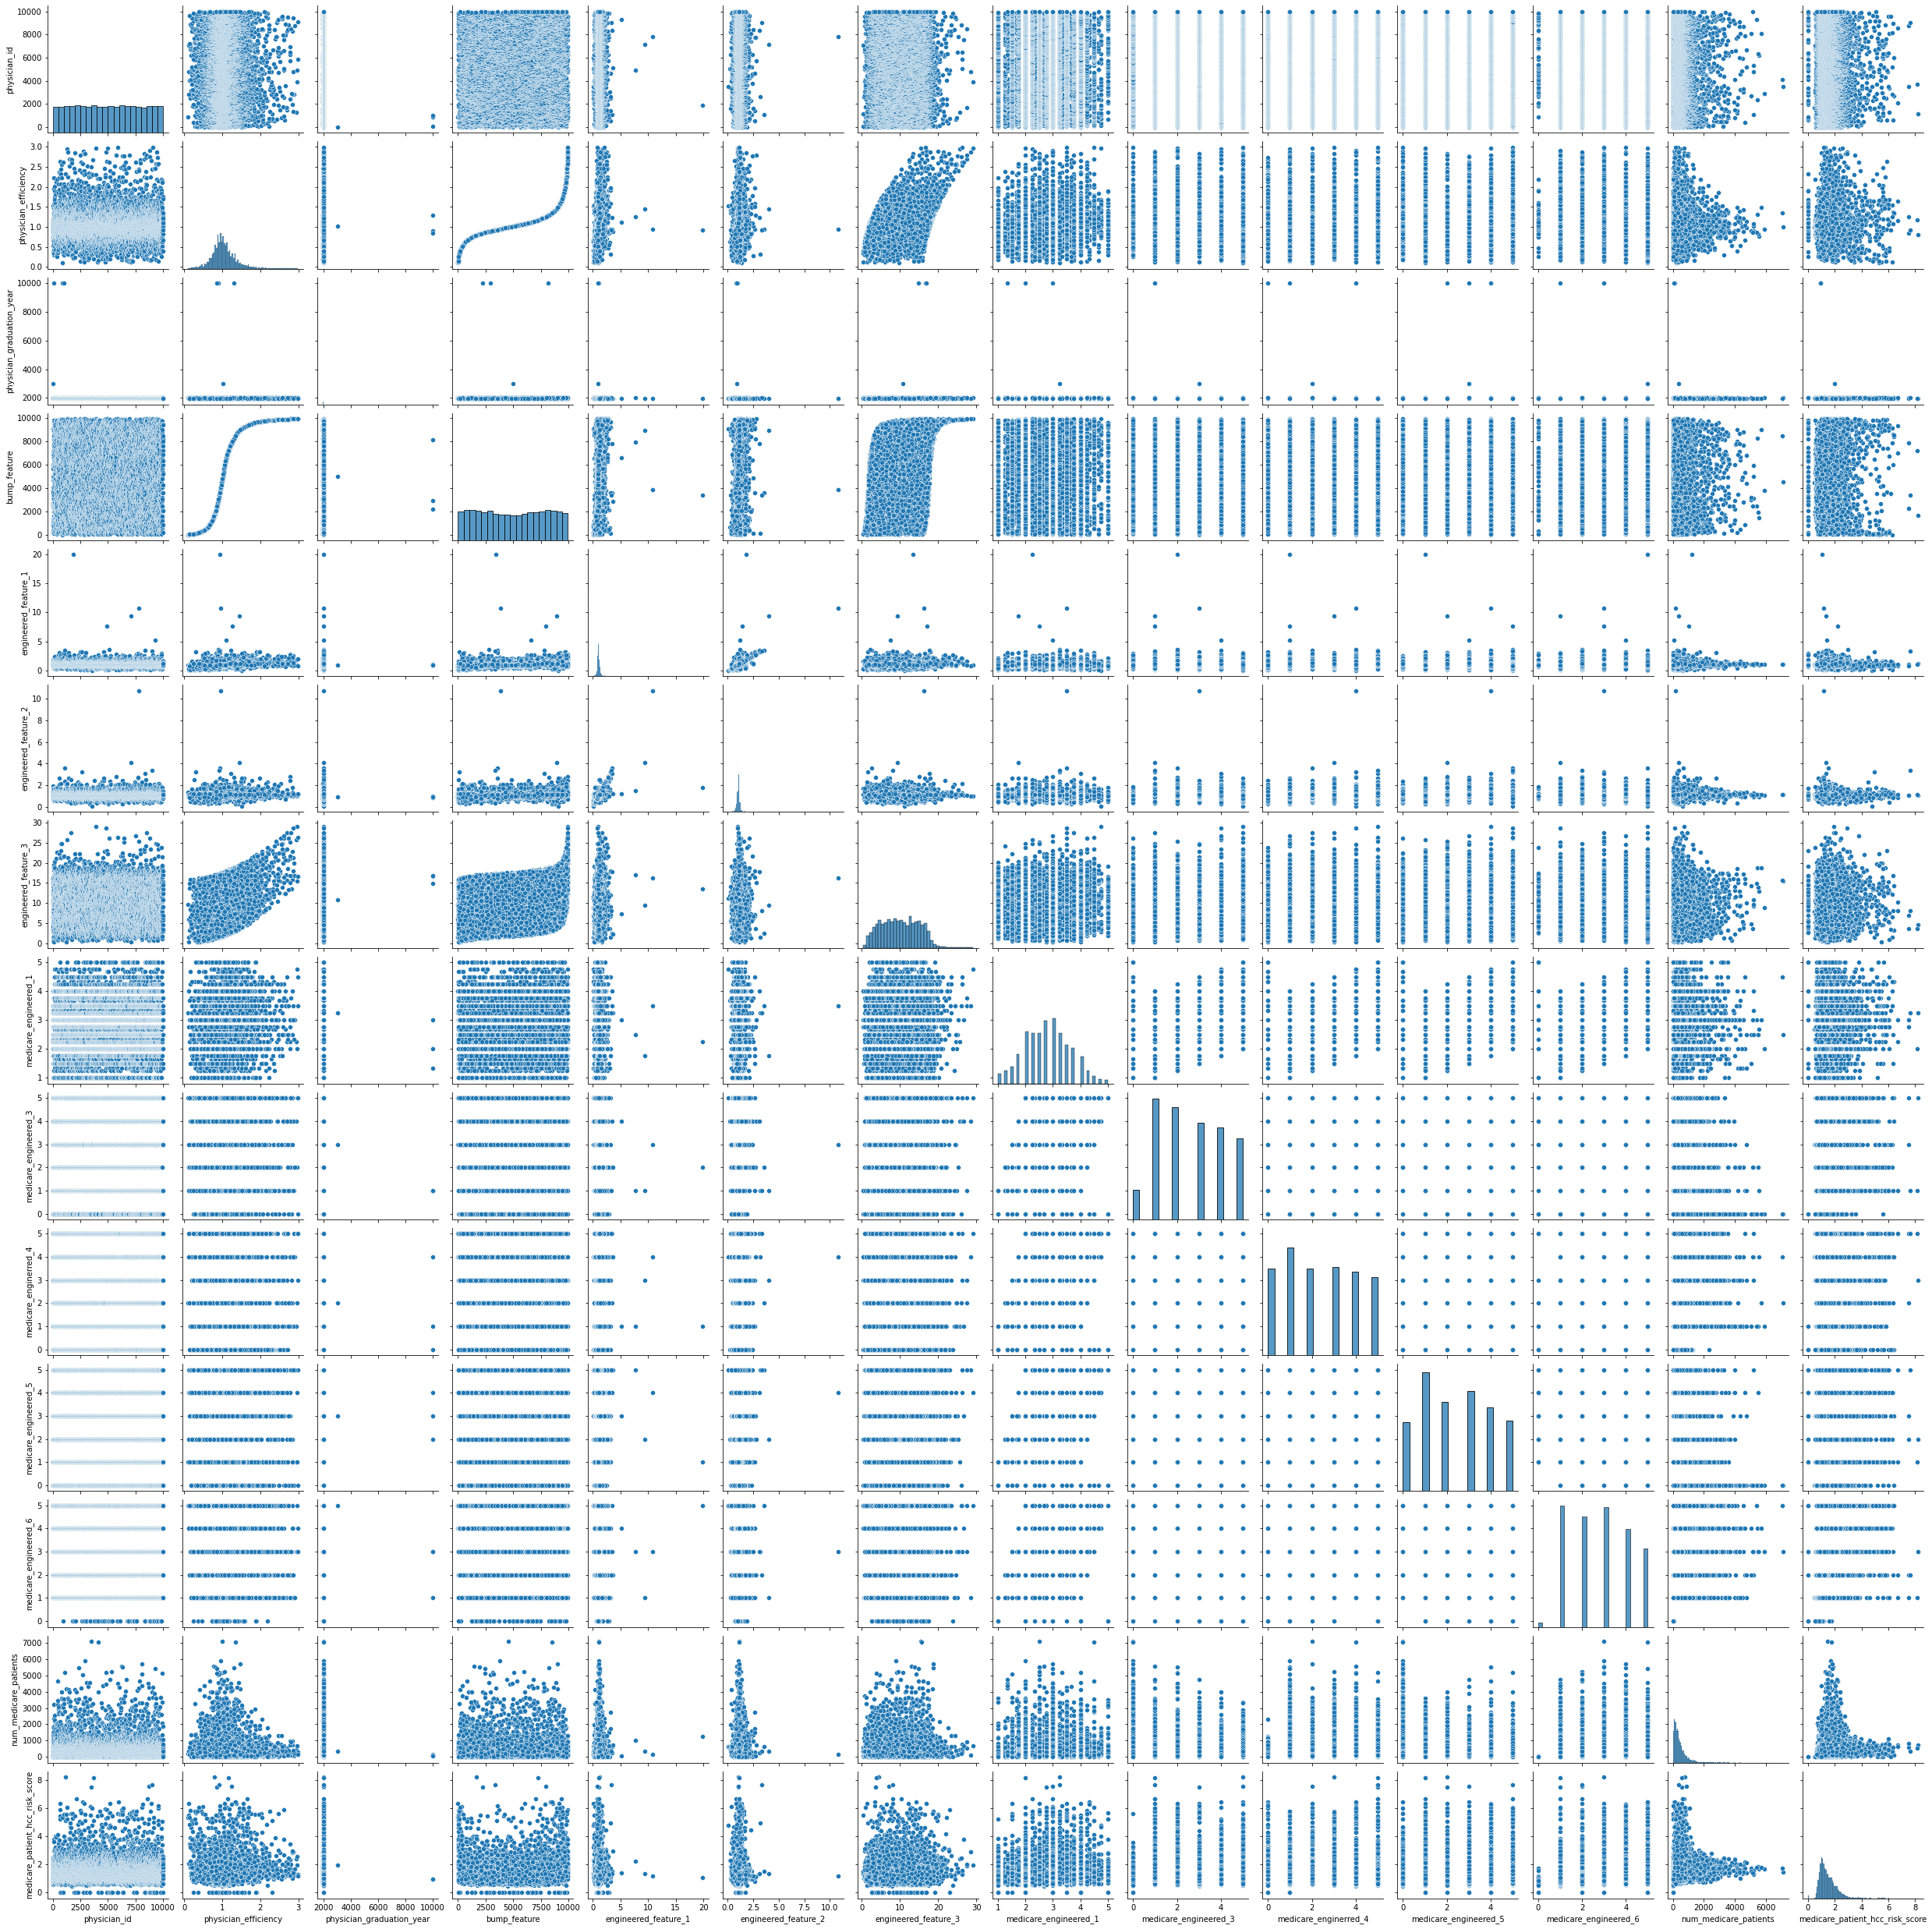

In [15]:
fig = sns.pairplot(df)
fig.savefig('pairplot.png')

In [16]:
to_drop

['medicare_engineered_2']

In [17]:
#Categorical Features
cat_features = ['metro_area','physician_working_specialty', 'physician_gender', 'physician_credential','physician_med_school']
for col in cat_features:
    df[col]=df[col].fillna('nan')

In [18]:
df['physician_graduation_year'] = df['physician_graduation_year'].fillna(df['physician_graduation_year'].median())

In [19]:
for col in cat_features:
      le = LabelEncoder()
      # print(df[col].head())
      df[col] = le.fit_transform(df[col])
      output = open(str(col)+'.pkl', 'wb')
      pickle.dump(le, output)
      output.close()

In [20]:
df.head()

,physician_id,physician_efficiency,metro_area,physician_working_specialty,physician_gender,physician_credential,physician_med_school,physician_graduation_year,bump_feature,engineered_feature_1,engineered_feature_2,engineered_feature_3,medicare_engineered_1,medicare_engineered_3,medicare_enginerred_4,medicare_engineered_5,medicare_engineered_6,num_medicare_patients,medicare_patient_hcc_risk_score
0,2,0.92,0,58,1,4,3,1995.0,3228,1.132,1.154,7.7,2.50,0,2,0,3,1482,2.055
1,3,0.72,0,66,1,2,27,1976.0,1077,1.756,1.736,13.1,4.00,4,5,3,4,522,1.398
2,4,1.08,1,15,0,2,86,2001.0,6034,1.093,1.086,12.9,2.50,3,3,3,1,87,0.800
3,5,0.97,1,14,1,2,2,1991.0,4098,1.231,1.231,14.2,2.25,2,5,1,1,330,1.014
4,6,1.00,1,32,0,4,88,1999.0,4652,1.056,1.056,8.5,4.00,5,4,2,5,30,0.806


In [21]:
Y = df['physician_efficiency']
X = df.drop(['physician_efficiency'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size= 0.25, random_state = 5)

In [22]:
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)

In [23]:
print(f'bias = {lr_model.intercept_}')
print(f'weights = {lr_model.coef_}')

bias = 0.4424727515829129
weights = [-1.53596089e-06  8.20645711e-03  7.73796010e-05  2.02733547e-03
 -6.92767785e-04 -2.10071025e-04 -3.37078906e-06  1.04063898e-04
  3.09429215e-02 -6.33223047e-03  6.89093105e-03  5.46972462e-04
 -4.65203572e-04  3.12453875e-03  3.19612986e-03  2.25491390e-04
 -4.13630467e-06  5.41080008e-03]


In [24]:
y_pred = lr_model.predict(X_test)

In [25]:
print("Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Square Error: ",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Square Error: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Absolute Error:  0.10116345325970877
Mean Square Error:  0.026519484220954164
Root Mean Square Error:  0.1628480402736065


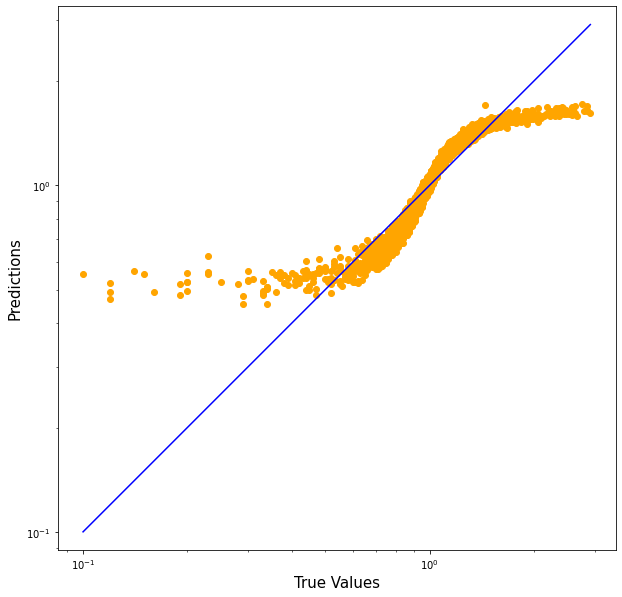

In [26]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='orange')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [27]:
print("R Square :",metrics.r2_score(y_test,y_pred))

R Square : 0.8029170161603527


In [119]:
xgb_model = xgb.XGBRegressor( seed=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [120]:
y_pred_xg = xgb_model.predict(X_test)

In [121]:
print("Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred_xg))
print("Mean Square Error: ",metrics.mean_squared_error(y_test,y_pred_xg))
print("Roo0t Mean Square Error: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred_xg)))

Absolute Error:  0.0012083858931754442
Mean Square Error:  2.2775327371109575e-05
Rooot Mean Square Error:  0.0047723502984493476


In [122]:
print("R Square :",metrics.r2_score(y_test,y_pred_xg))

R Square : 0.9998307422030224


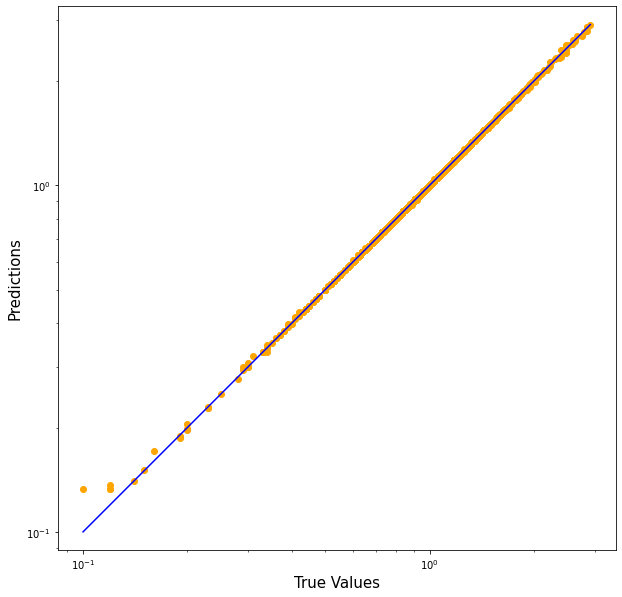

In [123]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_xg, c='orange')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_xg), max(y_test))
p2 = min(min(y_pred_xg), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()